Notebook này chạy trên Kaggle.

# Binary Classification of Insurance Cross Selling

[Link_to_competition](https://www.kaggle.com/competitions/playground-series-s4e7)

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Work with original datasets to process feature engineering

### EDA

In [2]:
import pandas as pd
data_dir = '/kaggle/input/health-insurance-cross-sell-prediction/'
raw_df = pd.read_csv(data_dir + 'train.csv')
test_df = pd.read_csv(data_dir + 'test.csv')

In [3]:
raw_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
raw_df['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

In [6]:
def view_feature(feature: str, is_numeric: bool=False):
    d = dict()    
    df = raw_df[[feature, 'Response']].copy()
    if is_numeric:
        des = df[feature].describe()
        value_min = des.get('min') - 0.000001
        value_25 = des.get('25%')
        value_50 = des.get('50%')
        value_75 = des.get('75%')
        value_max = des.get('max') + 0.000001
        df[feature] = pd.cut(df[feature], 
                             bins=[value_min, value_25, value_50, value_75, value_max],
                             labels=['Low','Medium1','Medium2','High'])
    total = df[feature].value_counts()
    idx = df['Response'].value_counts().index.tolist()
    for t in idx:
        x = df[df['Response']==t][feature].value_counts()
        d[t] = x/total*100
    
    return pd.DataFrame(data=d, columns=idx)

In [7]:
raw_df['Gender'].value_counts(dropna=False)

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [8]:
view_feature('Gender')

,0,1
Gender,,
Male,86.158893,13.841107
Female,89.609759,10.390241


count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

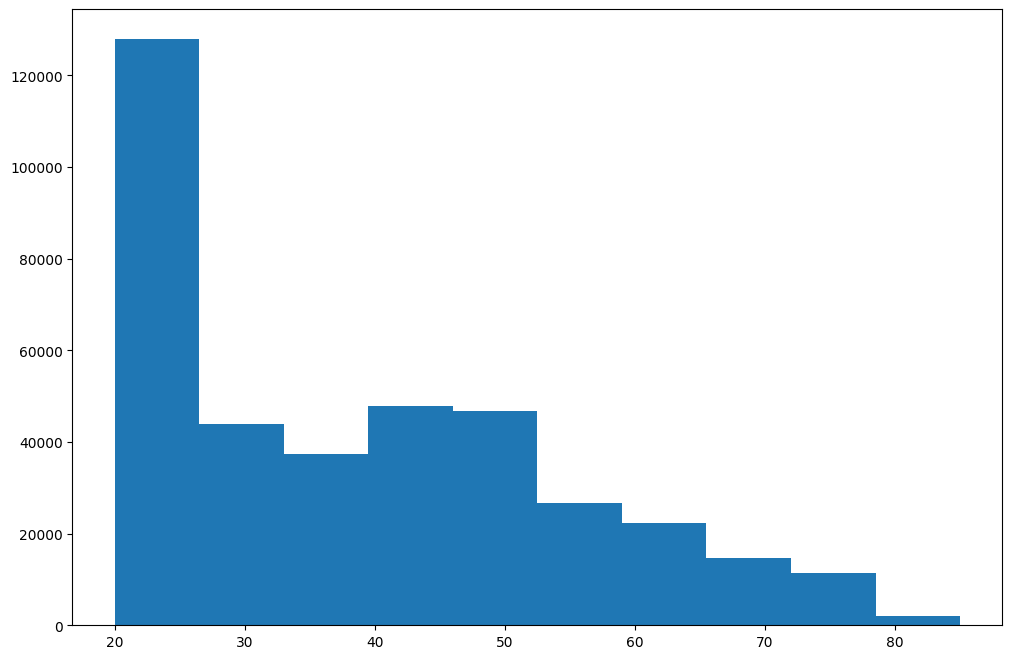

In [9]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['Age'], bins=10);
raw_df['Age'].describe()

In [10]:
view_feature('Age', is_numeric=True)

,0,1
Age,,
Low,96.465657,3.534343
Medium1,87.915681,12.084319
Medium2,78.657968,21.342032
High,86.118114,13.881886


In [11]:
raw_df['Driving_License'].value_counts(dropna=False)

Driving_License
1    380297
0       812
Name: count, dtype: int64

In [12]:
view_feature('Driving_License')

,0,1
Driving_License,,
1,87.728276,12.271724
0,94.950739,5.049261


In [13]:
raw_df['Region_Code'].value_counts()

Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
23.0      1960
31.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: count, dtype: int64

In [14]:
view_feature('Region_Code')

,0,1
Region_Code,,
0.0,91.390401,8.609599
1.0,89.186508,10.813492
2.0,92.892521,7.107479
3.0,87.233813,12.766187
4.0,84.175458,15.824542
5.0,88.428460,11.571540
6.0,93.009554,6.990446
7.0,86.825252,13.174748
8.0,90.385807,9.614193


In [15]:
raw_df['Previously_Insured'].value_counts()

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64

In [16]:
view_feature('Previously_Insured')

,0,1
Previously_Insured,,
0,77.454584,22.545416
1,99.909522,0.090478


In [17]:
raw_df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [18]:
view_feature('Vehicle_Age')

,0,1
Vehicle_Age,,
1-2 Year,82.624453,17.375547
< 1 Year,95.629483,4.370517
> 2 Years,70.625351,29.374649


In [19]:
raw_df['Vehicle_Damage'].value_counts()

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

In [20]:
view_feature('Vehicle_Damage')

,0,1
Vehicle_Damage,,
No,99.479586,0.520414
Yes,76.234454,23.765546


count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

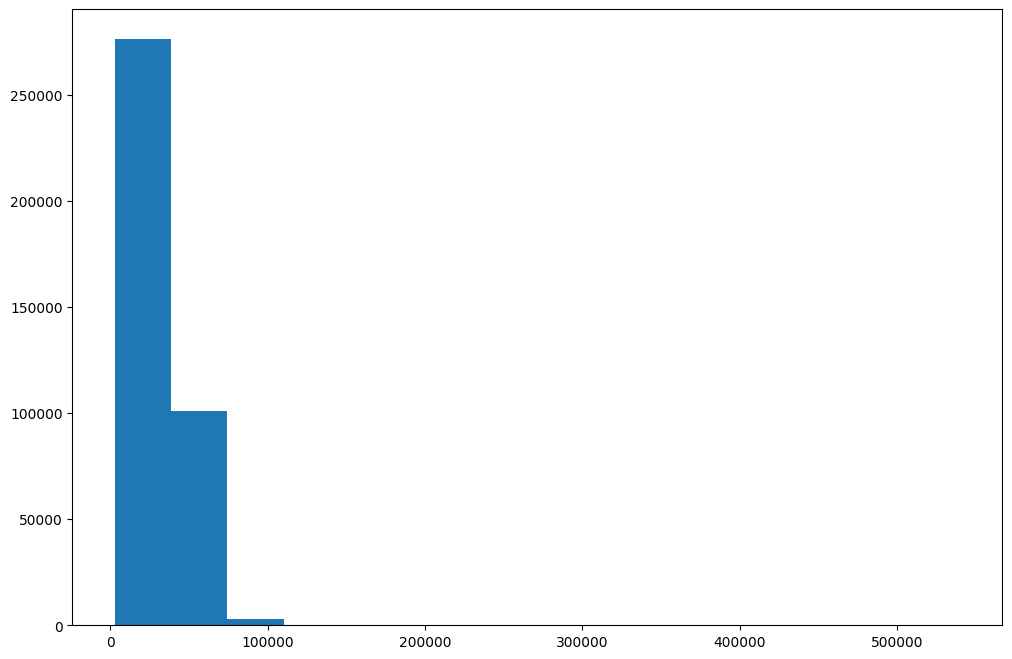

In [21]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['Annual_Premium'], bins=15);
raw_df['Annual_Premium'].describe()

In [22]:
view_feature('Annual_Premium', is_numeric=True)

,0,1
Annual_Premium,,
Low,88.181522,11.818478
Medium1,89.563000,10.437000
Medium2,87.796941,12.203059
High,85.433001,14.566999


In [23]:
raw_df['Policy_Sales_Channel'].value_counts()

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
84.0          1
123.0         1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

In [24]:
df = view_feature('Policy_Sales_Channel')
df[df[0]>=90]

,0,1
Policy_Sales_Channel,,
1.0,96.741155,3.258845
6.0,100.000000,NaN
8.0,91.749175,8.250825
11.0,91.022444,8.977556
15.0,91.216216,8.783784
...,...,...
151.0,96.859717,3.140283
152.0,97.137642,2.862358
153.0,94.069193,5.930807


count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

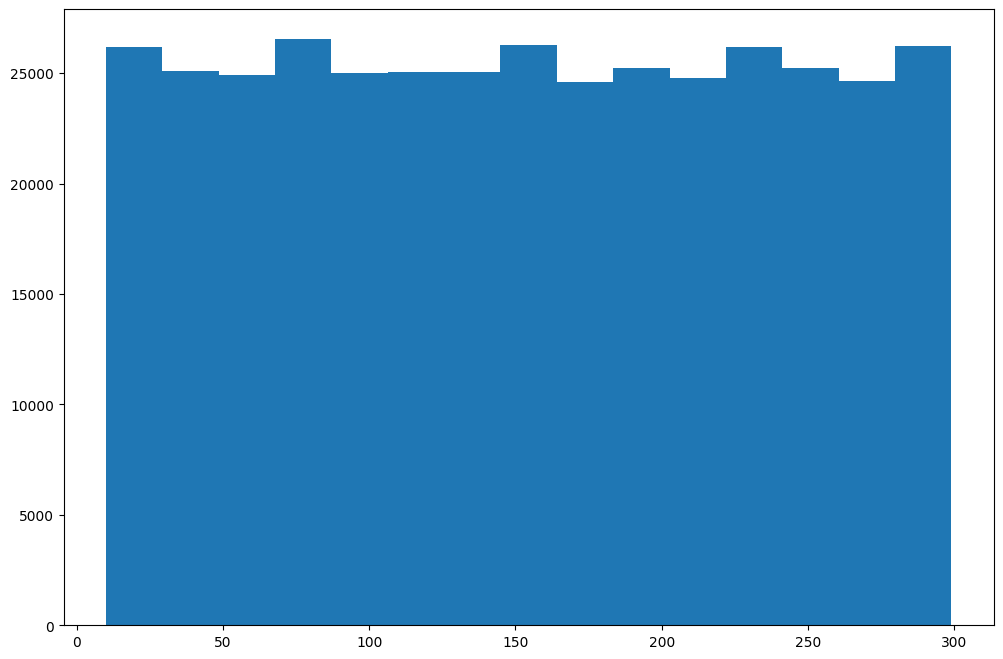

In [25]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['Vintage'], bins=15);
raw_df['Vintage'].describe()

In [26]:
view_feature('Vintage', is_numeric=True)

,0,1
Vintage,,
Low,87.685861,12.314139
Medium2,87.683787,12.316213
Medium1,87.741861,12.258139
High,87.864992,12.135008


### Feature engineering

In [27]:
raw_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [28]:
original_features = raw_df.columns.tolist()[1:-1]
original_features

['Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

In [29]:
new_features = []

In [30]:
def get_age_group(x):
    if x<=25:
        return 3
    if x<=36:
        return 2
    if x<=49:
        return 1
    return 0

def split_age(df: pd.DataFrame):
    df['Age_Group'] = df['Age'].apply(lambda x: get_age_group(x))

In [31]:
for df in [raw_df, test_df]:
    split_age(df)
new_features.append('Age_Group')

In [32]:
view_feature('Age_Group')

,0,1
Age_Group,,
0,86.118114,13.881886
1,78.657968,21.342032
2,87.915681,12.084319
3,96.465657,3.534343


In [33]:
def switch_to_num(df: pd.DataFrame):
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}).astype('int8')
    df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2}).astype('int8')
    df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1,'No':0}).astype('int8')
    df['Age'] = df['Age'].astype('int8')
    df['Driving_License'] = df['Driving_License'].astype('int8')
    df['Region_Code'] = df['Region_Code'].astype('int8')
    df['Previously_Insured'] = df['Previously_Insured'].astype('int8')
    df['Annual_Premium'] = df['Annual_Premium'].astype('int32')
    df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype('int16')
    df['Vintage'] = df['Vintage'].astype('int16')
    if 'Response' in df.columns.tolist():
        df['Response'] = df['Response'].astype('int8')

In [34]:
for df in [raw_df, test_df]:
    switch_to_num(df)

In [35]:
def f_sum(x: pd.Series, y: pd.Series):
    return ((x+y+1)*(x+y)/2 + x).astype('int8')

In [36]:
def get_sum_of_pairs(df: pd.DataFrame, col1: str, col2: str):
    name = f'sum_{col1}_{col2}'
    df[name] = f_sum(df[col1], df[col2])

In [37]:
for df in [raw_df, test_df]:
    get_sum_of_pairs(df, 'Driving_License','Previously_Insured')
view_feature('sum_Driving_License_Previously_Insured')

,0,1
sum_Driving_License_Previously_Insured,,
0,92.819615,7.180385
1,100.000000,NaN
2,77.411976,22.588024
4,99.909397,0.090603


In [38]:
new_features.append('sum_Driving_License_Previously_Insured')

In [39]:
for df in [raw_df, test_df]:
    get_sum_of_pairs(df, 'Vehicle_Age', 'Vehicle_Damage')
view_feature('sum_Vehicle_Age_Vehicle_Damage')

,0,1
sum_Vehicle_Age_Vehicle_Damage,,
0,99.668925,0.331075
1,85.857748,14.142252
2,99.173267,0.826733
4,73.320335,26.679665
5,100.000000,NaN
8,70.597799,29.402201


In [40]:
new_features.append('sum_Vehicle_Age_Vehicle_Damage')

In [41]:
for df in [raw_df, test_df]:
    get_sum_of_pairs(df, 'Previously_Insured', 'Vehicle_Damage')
view_feature('sum_Previously_Insured_Vehicle_Damage')

,0,1
sum_Previously_Insured_Vehicle_Damage,,
0,96.206753,3.793247
1,74.989452,25.010548
2,99.956286,0.043714
4,99.133239,0.866761


In [42]:
new_features.append('sum_Previously_Insured_Vehicle_Damage')

In [43]:
for df in [raw_df, test_df]:
    get_sum_of_pairs(df, 'Previously_Insured', 'Vehicle_Age')
view_feature('sum_Previously_Insured_Vehicle_Age')

,0,1
sum_Previously_Insured_Vehicle_Age,,
0,87.141854,12.858146
1,74.286434,25.713566
2,99.943253,0.056747
3,70.546958,29.453042
4,99.854573,0.145427
7,97.826087,2.173913


In [44]:
new_features.append('sum_Previously_Insured_Vehicle_Age')

In [45]:
for df in [raw_df, test_df]:
    get_sum_of_pairs(df, 'Driving_License', 'Vehicle_Age')
view_feature('sum_Driving_License_Vehicle_Age')

,0,1
sum_Driving_License_Vehicle_Age,,
0,100.000000,NaN
1,95.231788,4.768212
2,95.629457,4.370543
3,91.071429,8.928571
4,82.576756,17.423244
7,70.553570,29.446430


In [46]:
new_features.append('sum_Driving_License_Vehicle_Age')

In [47]:
for df in [raw_df, test_df]:
    get_sum_of_pairs(df, 'Driving_License', 'Vehicle_Damage')
view_feature('sum_Driving_License_Vehicle_Damage')

,0,1
sum_Driving_License_Vehicle_Damage,,
0,100.000000,NaN
1,92.625899,7.374101
2,99.478879,0.521121
4,76.186952,23.813048


In [48]:
new_features.append('sum_Driving_License_Vehicle_Damage')

In [49]:
def get_num_avg_cat(df: pd.DataFrame, num_f: str, cat_f: str):
    avg = df.groupby(cat_f)[num_f].mean()
    df[f'{num_f}_per_{cat_f}'] = df[cat_f].apply(lambda x: avg.get(x)).astype('float32')

In [50]:
for df in [raw_df, test_df]:
    get_num_avg_cat(df, 'Age', 'Region_Code')
view_feature('Age_per_Region_Code', is_numeric=True)

,0,1
Age_per_Region_Code,,
Low,92.112351,7.887649
Medium1,88.860178,11.139822
Medium2,84.739921,15.260079
High,89.880746,10.119254


In [51]:
new_features.append('Age_per_Region_Code')

In [52]:
for df in [raw_df, test_df]:
    get_num_avg_cat(df, 'Annual_Premium', 'Policy_Sales_Channel')

In [53]:
new_features.append('Annual_Premium_per_Policy_Sales_Channel')

In [54]:
for df in [raw_df, test_df]:
    get_num_avg_cat(df, 'Annual_Premium', 'Vintage')

In [55]:
view_feature('Annual_Premium_per_Vintage', is_numeric=True)

,0,1
Annual_Premium_per_Vintage,,
Low,87.715605,12.284395
Medium1,87.906128,12.093872
Medium2,87.798325,12.201675
High,87.551196,12.448804


In [56]:
new_features.append('Annual_Premium_per_Vintage')

In [57]:
for df in [raw_df, test_df]:
    get_num_avg_cat(df, 'Annual_Premium', 'Region_Code')

In [58]:
new_features.append('Annual_Premium_per_Region_Code')

### Preprocessing

In [59]:
all_features = original_features + new_features
len(all_features)

21

In [60]:
# If apply then the dtypes are float64, too big
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(raw_df[all_features])
# raw_df[all_features] = scaler.transform(raw_df[all_features])
# test_df[all_features] = scaler.transform(test_df[all_features])

In [61]:
raw_df[all_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,381109.0,0.459239,0.498336,0.000000,0.000000,0.000000,1.000000,1.000000
Age,381109.0,38.822584,15.511611,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,381109.0,0.997869,0.046110,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,381109.0,26.388807,13.229888,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,381109.0,0.458210,0.498251,0.000000,0.000000,0.000000,1.000000,1.000000
Vehicle_Age,381109.0,0.609616,0.567439,0.000000,0.000000,1.000000,1.000000,2.000000
Vehicle_Damage,381109.0,0.504877,0.499977,0.000000,0.000000,1.000000,1.000000,1.000000
Annual_Premium,381109.0,30564.389581,17213.155057,2630.000000,24405.000000,31669.000000,39400.000000,540165.000000
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.000000,29.000000,133.000000,152.000000,163.000000
Vintage,381109.0,154.347397,83.671304,10.000000,82.000000,154.000000,227.000000,299.000000


In [62]:
test_df[all_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,127037.0,0.462865,0.498621,0.000000,0.000000,0.000000,1.000000,1.000000
Age,127037.0,38.765903,15.465814,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,127037.0,0.998134,0.043152,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,127037.0,26.459866,13.209916,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,127037.0,0.460039,0.498403,0.000000,0.000000,0.000000,1.000000,1.000000
Vehicle_Age,127037.0,0.608775,0.567371,0.000000,0.000000,1.000000,1.000000,2.000000
Vehicle_Damage,127037.0,0.502491,0.499996,0.000000,0.000000,1.000000,1.000000,1.000000
Annual_Premium,127037.0,30524.643576,16945.297103,2630.000000,24325.000000,31642.000000,39408.000000,472042.000000
Policy_Sales_Channel,127037.0,111.800468,54.371765,1.000000,26.000000,135.000000,152.000000,163.000000
Vintage,127037.0,154.318301,83.661588,10.000000,82.000000,154.000000,227.000000,299.000000


In [63]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(raw_df[all_features], 
                                                                        raw_df['Response'],
                                                                        test_size=0.2,
                                                                        random_state=42)

### Model

In [64]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_auc_score

In [65]:
mutual_info = mutual_info_classif(train_inputs, train_targets, random_state=42)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_inputs.columns
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )
mutual_info.style.background_gradient("cool")

,Numerical_Feature_MI
Previously_Insured,0.121747
sum_Previously_Insured_Vehicle_Damage,0.115823
Vehicle_Damage,0.111204
sum_Driving_License_Previously_Insured,0.100297
sum_Previously_Insured_Vehicle_Age,0.099221
sum_Driving_License_Vehicle_Damage,0.098139
sum_Vehicle_Age_Vehicle_Damage,0.092126
Driving_License,0.060082
Policy_Sales_Channel,0.052692
Annual_Premium_per_Policy_Sales_Channel,0.051033


In [66]:
importance_features = mutual_info[mutual_info['Numerical_Feature_MI']>=0.01].index.tolist()
len(importance_features)

18

In [67]:
raw_df[all_features].dtypes

Gender                                        int8
Age                                           int8
Driving_License                               int8
Region_Code                                   int8
Previously_Insured                            int8
Vehicle_Age                                   int8
Vehicle_Damage                                int8
Annual_Premium                               int32
Policy_Sales_Channel                         int16
Vintage                                      int16
Age_Group                                    int64
sum_Driving_License_Previously_Insured        int8
sum_Vehicle_Age_Vehicle_Damage                int8
sum_Previously_Insured_Vehicle_Damage         int8
sum_Previously_Insured_Vehicle_Age            int8
sum_Driving_License_Vehicle_Age               int8
sum_Driving_License_Vehicle_Damage            int8
Age_per_Region_Code                        float32
Annual_Premium_per_Policy_Sales_Channel    float32
Annual_Premium_per_Vintage     

In [68]:
def test_features(model, features: list[str]):
    model.fit(train_inputs[features], train_targets)
    val_preds = model.predict_proba(val_inputs[features])[:,1]
    return roc_auc_score(val_targets, val_preds)

In [69]:
# Without importance_features
xgb_model = XGBClassifier(n_jobs=-1, device='cuda')
test_features(xgb_model, features=original_features)

0.8586939579289867

In [70]:
xgb_model = XGBClassifier(n_jobs=-1, device='cuda')
test_features(xgb_model, features=importance_features)

0.8600906967660327

In [71]:
lgbm_model = LGBMClassifier(n_jobs=-1)
test_features(lgbm_model, features=original_features)

[LightGBM] [Info] Number of positive: 37187, number of negative: 267700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 304887, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121970 -> initscore=-1.973908
[LightGBM] [Info] Start training from score -1.973908


0.8604156349916379

In [72]:
lgbm_model = LGBMClassifier(n_jobs=-1)
test_features(lgbm_model, features=importance_features)

[LightGBM] [Info] Number of positive: 37187, number of negative: 267700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 304887, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121970 -> initscore=-1.973908
[LightGBM] [Info] Start training from score -1.973908


0.8611376577498

In [74]:
cat_model = CatBoostClassifier(iterations=2000, verbose=250, task_type='GPU')
test_features(cat_model, features=original_features)

Learning rate set to 0.013226
0:	learn: 0.6670508	total: 162ms	remaining: 5m 24s
250:	learn: 0.2670345	total: 2.79s	remaining: 19.5s
500:	learn: 0.2647871	total: 5.15s	remaining: 15.4s
750:	learn: 0.2638184	total: 7.46s	remaining: 12.4s
1000:	learn: 0.2631069	total: 9.61s	remaining: 9.59s
1250:	learn: 0.2624912	total: 11.8s	remaining: 7.07s
1500:	learn: 0.2619571	total: 14.2s	remaining: 4.72s
1750:	learn: 0.2614787	total: 16.6s	remaining: 2.37s
1999:	learn: 0.2610445	total: 18.9s	remaining: 0us


0.8614128498093211

In [75]:
cat_model = CatBoostClassifier(iterations=2000, verbose=250, task_type='GPU')
test_features(cat_model, features=importance_features)

Learning rate set to 0.013226
0:	learn: 0.6669673	total: 12.4ms	remaining: 24.8s
250:	learn: 0.2665810	total: 2.48s	remaining: 17.3s
500:	learn: 0.2643590	total: 5.03s	remaining: 15s
750:	learn: 0.2634459	total: 7.49s	remaining: 12.5s
1000:	learn: 0.2628103	total: 9.98s	remaining: 9.96s
1250:	learn: 0.2622708	total: 12.6s	remaining: 7.56s
1500:	learn: 0.2618333	total: 15.2s	remaining: 5.05s
1750:	learn: 0.2614476	total: 17.7s	remaining: 2.52s
1999:	learn: 0.2611068	total: 19.8s	remaining: 0us


0.8613942635805463

Như vậy trong cả 3 trường hợp việc sử dụng `importance_features` đem lại hiệu quả tốt hơn.

In [76]:
def feature_engineering(df: pd.DataFrame, reference_df: pd.DataFrame|None=None):
    switch_to_num(df)
    
    df['Age_Group'] = df['Age'].apply(lambda x: get_age_group(x))
    
    get_sum_of_pairs(df, 'Driving_License','Previously_Insured')
    get_sum_of_pairs(df, 'Driving_License','Vehicle_Age')
    get_sum_of_pairs(df, 'Driving_License','Vehicle_Damage')
    get_sum_of_pairs(df, 'Previously_Insured','Vehicle_Age')
    get_sum_of_pairs(df, 'Previously_Insured','Vehicle_Damage')
    get_sum_of_pairs(df, 'Vehicle_Age','Vehicle_Damage')
    
    get_num_avg_cat(df, 'Age', 'Region_Code')
    get_num_avg_cat(df, 'Annual_Premium', 'Policy_Sales_Channel')
    get_num_avg_cat(df, 'Annual_Premium', 'Region_Code')

## Work with competitions datasets

### EDA & Feature Engineering

In [77]:
%%time
data_dir = '/kaggle/input/playground-series-s4e7/'
raw_df = pd.read_csv(data_dir + 'train.csv')
test_df = pd.read_csv(data_dir + 'test.csv')
sub_df = pd.read_csv(data_dir + 'sample_submission.csv')

CPU times: user 24.7 s, sys: 4.16 s, total: 28.9 s
Wall time: 38 s


In [78]:
%%time
for df in [raw_df, test_df]:
    feature_engineering(df, raw_df)

CPU times: user 5min 46s, sys: 3.32 s, total: 5min 50s
Wall time: 5min 49s


In [79]:
original_df = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
feature_engineering(original_df)

In [80]:
sample_df = raw_df.sample(1000000, random_state=42)
train_df, val_df = train_test_split(sample_df, test_size=0.25, random_state=42)

### Training model and hyperparameter tuning

In [81]:
def test_params(train_df: pd.DataFrame, val_df: pd.DataFrame,
                importance_features: list[str], add_original:bool=False,
                is_scaler: bool=False, **params):
    if add_original:
        train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
    if is_scaler:
        scaler = MinMaxScaler()
        scaler.fit(train_df[importance_features])
        train_df[importance_features] = scaler.transform(train_df[importance_features])
        val_df[importance_features] = scaler.transform(val_df[importance_features])
    train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
    train_inputs, train_targets = train_df[importance_features], train_df['Response']
    val_inputs, val_targets = val_df[importance_features], val_df['Response']
    eval_set = (val_inputs, val_targets)
    model = XGBClassifier(**params, early_stopping_rounds=50, device='cuda', nthread=2)
    model.fit(train_inputs, train_targets, 
              eval_set=[eval_set], verbose=False)
    best_iter = model.best_iteration
    train_preds = model.predict_proba(train_inputs, iteration_range=(0,best_iter))[:,1]
    val_preds = model.predict_proba(val_inputs, iteration_range=(0,best_iter))[:,1]
    train_acc = roc_auc_score(train_targets, train_preds)
    val_acc = roc_auc_score(val_targets, val_preds)
    return train_acc, val_acc

In [82]:
from sklearn.model_selection import GridSearchCV

#### XGB Regressor

In [83]:
%%time
test_params(train_df, val_df, 
            importance_features=original_features,
            add_original=True, is_scaler=False)

CPU times: user 5.51 s, sys: 184 ms, total: 5.7 s
Wall time: 3.31 s


(0.8743747509374677, 0.8752476220247649)

Trong tập dữ liệu lớn, có vẻ việc thêm các feature làm giảm hiệu quả (do overfitting). Vì vậy ta sử dụng features nguyên thủy

In [84]:
train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
train_inputs, train_targets = train_df[original_features], train_df['Response']
val_inputs, val_targets = val_df[original_features], val_df['Response']

In [85]:
param_grid = {
    'n_estimators': [525,900],
    'max_depth': [15,16],
    'learning_rate': [0.05,0.12],
    'reg_alpha': [0.25],
    'subsample': [0.8,0.83],
    'min_split_loss': [0.0015],
    'min_child_weight': [5],
    'eval_metric': ['auc'],
    'tree_method': ['hist'],
    'colsample_bytree': [0.25,0.28],
    'max_bin': [2**16,2**17],
    'nthread': [2],
    'device': ['cuda']
}
grid = GridSearchCV(XGBClassifier(), param_grid=param_grid, 
                    scoring='roc_auc', cv=3,
                    refit=True, verbose=3)

In [86]:
# Run and receive best params in over 90 mins
# %%time
# grid.fit(train_inputs, train_targets)

In [88]:
%%time
train_acc, val_acc = test_params(train_df, val_df, add_original=False, 
                                    importance_features=original_features,
                                    n_estimators=900, learning_rate=0.05,
                                    reg_alpha=0.25, subsample=0.83,
                                    colsample_bytree=0.28, max_depth=16,
                                    min_child_weight=5, min_split_loss=0.0015,
                                    eval_metric='auc', max_bin=65536*2,
                                    tree_method='hist', n_jobs=-1)
print(f'train_acc = {train_acc}, val_acc = {val_acc}')

train_acc = 0.9012692316669448, val_acc = 0.8827257281887289
CPU times: user 1min 15s, sys: 469 ms, total: 1min 16s
Wall time: 1min 13s


In [89]:
train_df, val_df = train_test_split(raw_df, test_size=0.25, random_state=42)

In [90]:
train_df.shape, val_df.shape

((8628598, 22), (2876200, 22))

In [91]:
train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
train_inputs, train_targets = train_df[original_features], train_df['Response']
val_inputs, val_targets = val_df[original_features], val_df['Response']

In [92]:
best_xgb_hyperparameters = {
    'colsample_bytree': 0.28,
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_bin': 65536*2,
    'max_depth': 16,
    'min_child_weight': 5,
    'min_split_loss': 0.0015,
    'n_estimators': 900,
    'nthread': 2,
    'reg_alpha': 0.25,
    'subsample': 0.83,
    'tree_method': 'gpu_hist',
    'n_jobs': -1
}

In [93]:
xgb_model = XGBClassifier(**best_xgb_hyperparameters, 
                          early_stopping_rounds=50,
                          device='cuda')
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.28, device='cuda', early_stopping_rounds=50,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=131072,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=5, min_split_loss=0.0015, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=900,
              n_jobs=-1, nthread=2, ...)

In [94]:
eval_set = (val_inputs, val_targets)

In [95]:
%%time
xgb_model.fit(train_inputs, train_targets, eval_set=[eval_set], verbose=False)

CPU times: user 5min 31s, sys: 1.57 s, total: 5min 32s
Wall time: 5min 18s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.28, device='cuda', early_stopping_rounds=50,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=131072,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=5, min_split_loss=0.0015, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=900,
              n_jobs=-1, nthread=2, ...)

In [96]:
best_iter = xgb_model.best_iteration
train_preds = xgb_model.predict_proba(train_inputs, iteration_range=(0,best_iter))[:,1]
val_preds = xgb_model.predict_proba(val_inputs, iteration_range=(0,best_iter))[:,1]
train_acc = roc_auc_score(train_targets, train_preds)
val_acc = roc_auc_score(val_targets, val_preds)

In [97]:
train_acc, val_acc

(0.895509152007662, 0.8893008379746848)

In [98]:
test_inputs = test_df[original_features]
test_preds = xgb_model.predict_proba(test_inputs, iteration_range=(0,best_iter))[:,1]
sub_df['Response'] = test_preds
sub_df.to_csv('/kaggle/working/sub4.csv', index=None)

#### CatBoost

In [99]:
def test_params(train_df: pd.DataFrame, val_df: pd.DataFrame,
                importance_features: list[str], add_original:bool=False,
                is_scaler: bool=False, **params):
    if add_original:
        train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
    if is_scaler:
        scaler = MinMaxScaler()
        scaler.fit(train_df[importance_features])
        train_df[importance_features] = scaler.transform(train_df[importance_features])
        val_df[importance_features] = scaler.transform(val_df[importance_features])
    train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
    train_inputs, train_targets = train_df[importance_features], train_df['Response']
    val_inputs, val_targets = val_df[importance_features], val_df['Response']
    eval_set = (val_inputs, val_targets)
    model = CatBoostClassifier(**params, 
                               early_stopping_rounds=50, 
                               task_type='GPU', 
                               logging_level='Silent')
    model.fit(train_inputs, train_targets, 
              eval_set=eval_set, verbose=False)
    best_iter = model.get_best_iteration()
    train_preds = model.predict_proba(train_inputs)[:,1]
    val_preds = model.predict_proba(val_inputs)[:,1]
    train_acc = roc_auc_score(train_targets, train_preds)
    val_acc = roc_auc_score(val_targets, val_preds)
    return train_acc, val_acc

In [100]:
sample_df = raw_df.sample(1000000, random_state=42)
train_df, val_df = train_test_split(sample_df, test_size=0.25, random_state=42)

In [103]:
%%time
test_params(train_df, val_df, 
            importance_features=original_features,
            add_original=True, is_scaler=False,
            iterations=2000,
            devices='0:1',
            cat_features=original_features)

CPU times: user 3min 34s, sys: 10.9 s, total: 3min 45s
Wall time: 1min 40s


(0.9997023610180983, 0.8815422098059347)

In [104]:
train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
train_inputs, train_targets = train_df[original_features], train_df['Response']
val_inputs, val_targets = val_df[original_features], val_df['Response']

In [109]:
param_grid = {
    'eval_metric': ['AUC'],
    'iterations': [3800,8900],
    'learning_rate': [0.05],
    'random_seed': [42],
    'l2_leaf_reg': [10,55],
    'task_type': ['GPU'],
    'random_strength': [9],
    'depth': [6,9],
    'border_count': [152,402],
    'logging_level': ['Silent'],
    'devices': ['0:1']
}
grid = GridSearchCV(CatBoostClassifier(), param_grid=param_grid, 
                    scoring='roc_auc', cv=3,
                    refit=True, verbose=3)

In [110]:
%%time
grid.fit(train_inputs, train_targets)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.856 total time=  39.0s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.871 total time=  37.7s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.871 total time=  39.0s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.856 total time=  38.7s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.871 total time=  38.4s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.871 total time=  38.0s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.855 total time= 1.5min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.871 total time= 1.5min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.871 total time= 1.5min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.855 total time= 1.5min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.871 total time= 1.5min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=152, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.871 total time= 1.5min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.854 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.868 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.868 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.855 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.869 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.869 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.851 total time= 2.8min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.865 total time= 2.8min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.865 total time= 2.8min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.852 total time= 2.8min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.866 total time= 2.8min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=152, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.866 total time= 2.7min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.856 total time=  38.8s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.873 total time=  39.1s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.874 total time=  37.9s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.856 total time=  38.3s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.873 total time=  39.6s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.874 total time=  38.8s


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.855 total time= 1.5min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.874 total time= 1.5min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.875 total time= 1.5min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.855 total time= 1.4min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.874 total time= 1.5min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=402, depth=6, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.875 total time= 1.5min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.854 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.871 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.872 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.855 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.871 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=3800, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.872 total time= 1.2min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.851 total time= 2.8min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.868 total time= 2.8min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=10, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.869 total time= 2.8min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 1/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.852 total time= 2.8min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 2/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.869 total time= 2.9min


Default metric period is 5 because AUC is/are not implemented for GPU


[CV 3/3] END border_count=402, depth=9, devices=0:1, eval_metric=AUC, iterations=8900, l2_leaf_reg=55, learning_rate=0.05, logging_level=Silent, random_seed=42, random_strength=9, task_type=GPU;, score=0.870 total time= 2.8min


Default metric period is 5 because AUC is/are not implemented for GPU


CPU times: user 2h 51min 21s, sys: 49min 41s, total: 3h 41min 2s
Wall time: 1h 14min 53s


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fc958ad31f0>,
             param_grid={'border_count': [152, 402], 'depth': [6, 9],
                         'devices': ['0:1'], 'eval_metric': ['AUC'],
                         'iterations': [3800, 8900], 'l2_leaf_reg': [10, 55],
                         'learning_rate': [0.05], 'logging_level': ['Silent'],
                         'random_seed': [42], 'random_strength': [9],
                         'task_type': ['GPU']},
             scoring='roc_auc', verbose=3)

In [111]:
grid.best_params_ # Fit in 1h14min

{'border_count': 402,
 'depth': 6,
 'devices': '0:1',
 'eval_metric': 'AUC',
 'iterations': 8900,
 'l2_leaf_reg': 55,
 'learning_rate': 0.05,
 'logging_level': 'Silent',
 'random_seed': 42,
 'random_strength': 9,
 'task_type': 'GPU'}

In [129]:
best_cat_hyperparameters = {
    'border_count': 402,
    'depth': 9, ## Add original features make depth=9 take higher than depth=6
    'devices': '0:1',
    'eval_metric': 'AUC',
    'iterations': 8900,
    'l2_leaf_reg': 55,
    'learning_rate': 0.05,
    'random_seed': 42,
    'random_strength': 9,
    'cat_features': original_features
}

In [128]:
%%time
test_params(train_df, val_df, importance_features=original_features,
            add_original=False, is_scaler=False,
            **best_cat_hyperparameters)

Default metric period is 5 because AUC is/are not implemented for GPU


CPU times: user 10min 1s, sys: 31.1 s, total: 10min 32s
Wall time: 4min 41s


(0.9998899128351308, 0.8846103847217606)

In [131]:
cat_model = CatBoostClassifier(**best_cat_hyperparameters,
                               logging_level='Silent',
                               task_type='GPU',
                               early_stopping_rounds=50)
cat_model.get_params()

{'iterations': 8900,
 'learning_rate': 0.05,
 'depth': 9,
 'l2_leaf_reg': 55,
 'border_count': 402,
 'random_seed': 42,
 'logging_level': 'Silent',
 'random_strength': 9,
 'eval_metric': 'AUC',
 'task_type': 'GPU',
 'devices': '0:1',
 'early_stopping_rounds': 50,
 'cat_features': ['Gender',
  'Age',
  'Driving_License',
  'Region_Code',
  'Previously_Insured',
  'Vehicle_Age',
  'Vehicle_Damage',
  'Annual_Premium',
  'Policy_Sales_Channel',
  'Vintage']}

In [133]:
train_df, val_df = train_test_split(raw_df, test_size=0.25, random_state=42)
train_df = pd.concat([original_df, train_df]).reset_index(drop=True).copy()
train_inputs, train_targets = train_df[original_features], train_df['Response']
val_inputs, val_targets = val_df[original_features], val_df['Response']

In [135]:
eval_set = (val_inputs, val_targets)

In [136]:
%%time
cat_model.fit(train_inputs, train_targets,
              eval_set=eval_set, verbose=False)

Default metric period is 5 because AUC is/are not implemented for GPU


CPU times: user 2h 35min 14s, sys: 3min 37s, total: 2h 38min 52s
Wall time: 1h 16min 21s


In [138]:
train_preds = cat_model.predict_proba(train_inputs)[:,1]
val_preds = cat_model.predict_proba(val_inputs)[:,1]
train_acc = roc_auc_score(train_targets, train_preds)
val_acc = roc_auc_score(val_targets, val_preds)

In [141]:
train_acc, val_acc

(0.9310360586073525, 0.8951143855542416)

In [143]:
test_preds = cat_model.predict_proba(test_inputs)[:,1]
sub_df['Response'] = test_preds
sub_df.to_csv('/kaggle/working/sub5.csv', index=None)

In [144]:
sub_df.head()

,id,Response
0,11504798,0.004476
1,11504799,0.648053
2,11504800,0.238553
3,11504801,0.000063
4,11504802,0.188612
